In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import abel
%matplotlib notebook 

In [2]:
groundmat = scipy.io.loadmat('ground_state_density.mat')
rydbergmat = scipy.io.loadmat('rydberg_summary.mat')

In [3]:
print(groundmat['data_vars'].dtype)
print('\n')
print(rydbergmat['data_vars'].dtype)

[('average_density', 'O'), ('std_density', 'O'), ('sem_density', 'O')]


[('rydberg_density', 'O'), ('rydberg_density_std', 'O'), ('rydberg_density_sem', 'O'), ('rydberg_fraction', 'O'), ('rydberg_fraction_err', 'O'), ('ions', 'O')]


In [4]:
xdim = groundmat['dims'][0][0][1][0][0]
ydim = groundmat['dims'][0][0][2][0][0]
MWdim = groundmat['dims'][0][0][0][0][0]
tEXCdim = rydbergmat['dims'][0][0][1][0][0]
xcoords = groundmat['coords'][0][0][0][0][0][2][0]
ycoords = groundmat['coords'][0][0][1][0][0][2][0]
MWDuration = groundmat['coords'][0][0][2][0][0][2][0]
tEXCcoords = rydbergmat['coords'][0][0][0+3][0][0][2][0]
grdata = groundmat['data_vars'][0][0][0+0][0][0][2]
ryddata = rydbergmat['data_vars'][0][0][0+0][0][0][2]

<IPython.core.display.Javascript object>


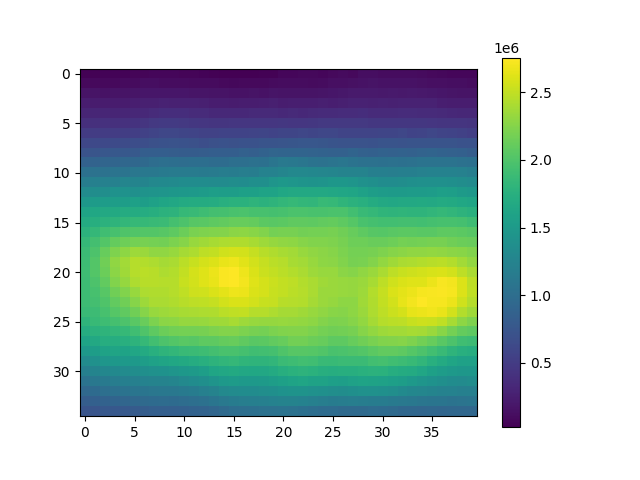

In [7]:
plt.imshow(grdata[1,10:-5,60:100])
plt.colorbar()

<IPython.core.display.Javascript object>


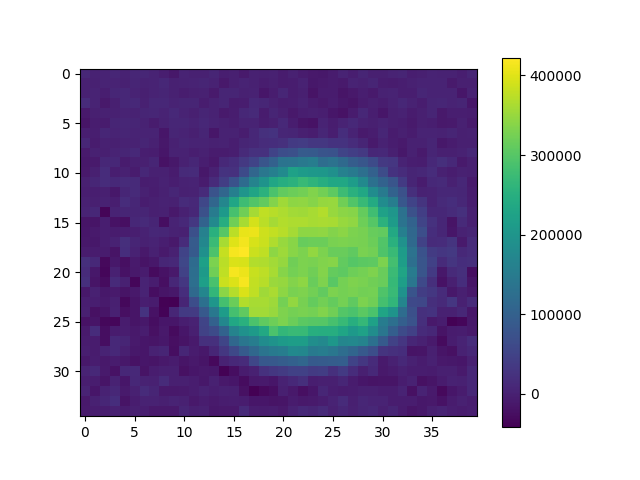

In [9]:
plt.imshow(ryddata[1,8,10:-5,60:100])
plt.colorbar()

In [115]:
def find_laser(IM, com, widthx = 3,widthy = 3):
    tmp = IM[com[0],com[1]]
    pos = np.array([com[0],com[1]])
    print(pos)
    for i in range(-widthx,widthx+1):
        for j in range(-widthy,widthy+1):
            if IM[com[0]+i,com[1]+j] < tmp:
                tmp = IM[com[0]+i,com[1]+j]
                pos[0] = com[0]+i
                pos[1] = com[1]+j
                print(pos)
    return pos
    

In [116]:
las = find_laser(grdata[1],coms[1])

[26 78]
[23 75]
[23 76]
[23 77]
[23 78]
[23 79]
[23 80]
[23 81]


<IPython.core.display.Javascript object>


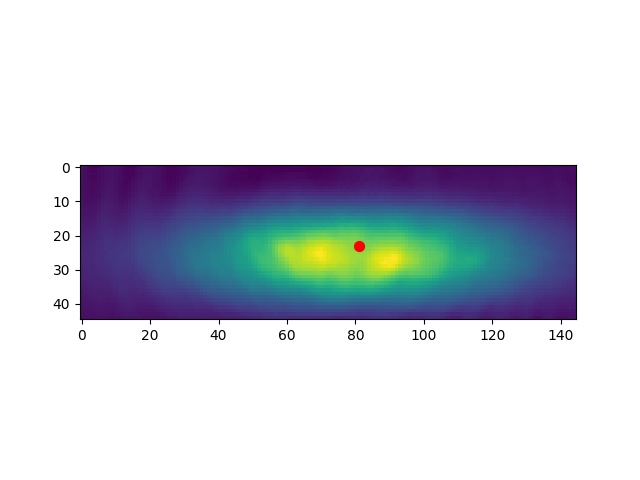

In [117]:
plt.imshow(grdata[1])
plt.scatter(las[1], las[0], s=50, c='red', marker='o')

In [100]:
grdata = groundmat['data_vars'][0][0][0+0][0][0][2]
grdata = grdata[:,5:,5:150]
coms = np.array([abel.tools.center.find_center(grdata[0],center='com'),abel.tools.center.find_center(grdata[1],center='com')])
coms = coms.astype(int)
coms

array([[26, 78],
       [26, 78]])

<IPython.core.display.Javascript object>


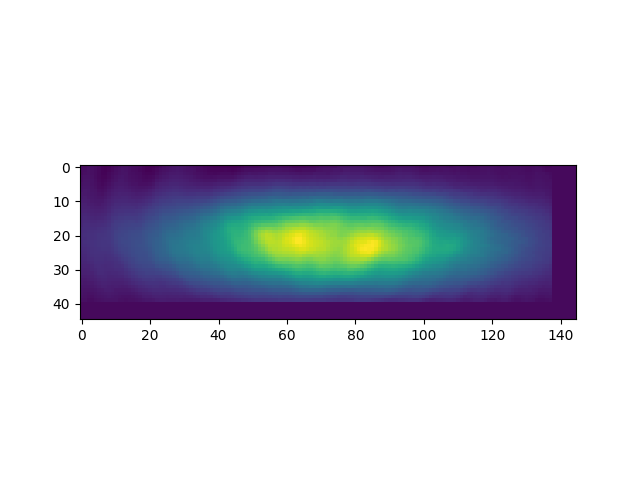

In [48]:
plt.imshow(abel.tools.center.center_image(grdata[1]))

In [ ]:
abel.tools.center.center_image()

<IPython.core.display.Javascript object>


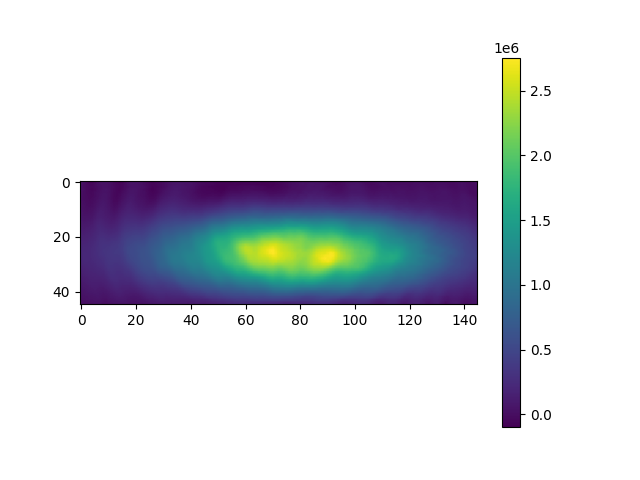

In [38]:
plt.imshow(grdata[1])
plt.colorbar()